In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Load data and clean

In [118]:
df = pd.read_csv('Layoff.csv')
df = df.drop(['Company', 'City', 'Effective Date', 'Closure/Layoff','Temporary/Permanent','Union','Region','County'], axis=1)
df['WARN Received Date'] = pd.to_datetime(df['WARN Received Date'])

In [130]:
# Check for missing values
df.isna().sum()

State                                                        0
Number of Workers                                            0
WARN Received Date                                           0
Open                                                       168
High                                                       168
Low                                                        168
Close                                                      168
Volume                                                     168
CPI                                                         18
PPI                                                         18
GDP                                                         18
unemployment_rate                                           18
job_nonfam                                                  18
job_IT                                                      18
job_service                                                 18
job_retail                                             

# Exploratory Data Analysis

array([[<Axes: title={'center': 'Number of Workers'}>,
        <Axes: title={'center': 'WARN Received Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'PPI'}>, <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'unemployment_rate'}>,
        <Axes: title={'center': 'job_nonfam'}>],
       [<Axes: title={'center': 'job_IT'}>,
        <Axes: title={'center': 'job_service'}>,
        <Axes: title={'center': 'job_retail'}>,
        <Axes: title={'center': 'job_education_health'}>],
       [<Axes: title={'center': 'fed_rate'}>,
        <Axes: title={'center': 'PPI_chg'}>,
        <Axes: title={'center': 'PPI_CPI'}>, <Axes: >]], dtype=object)

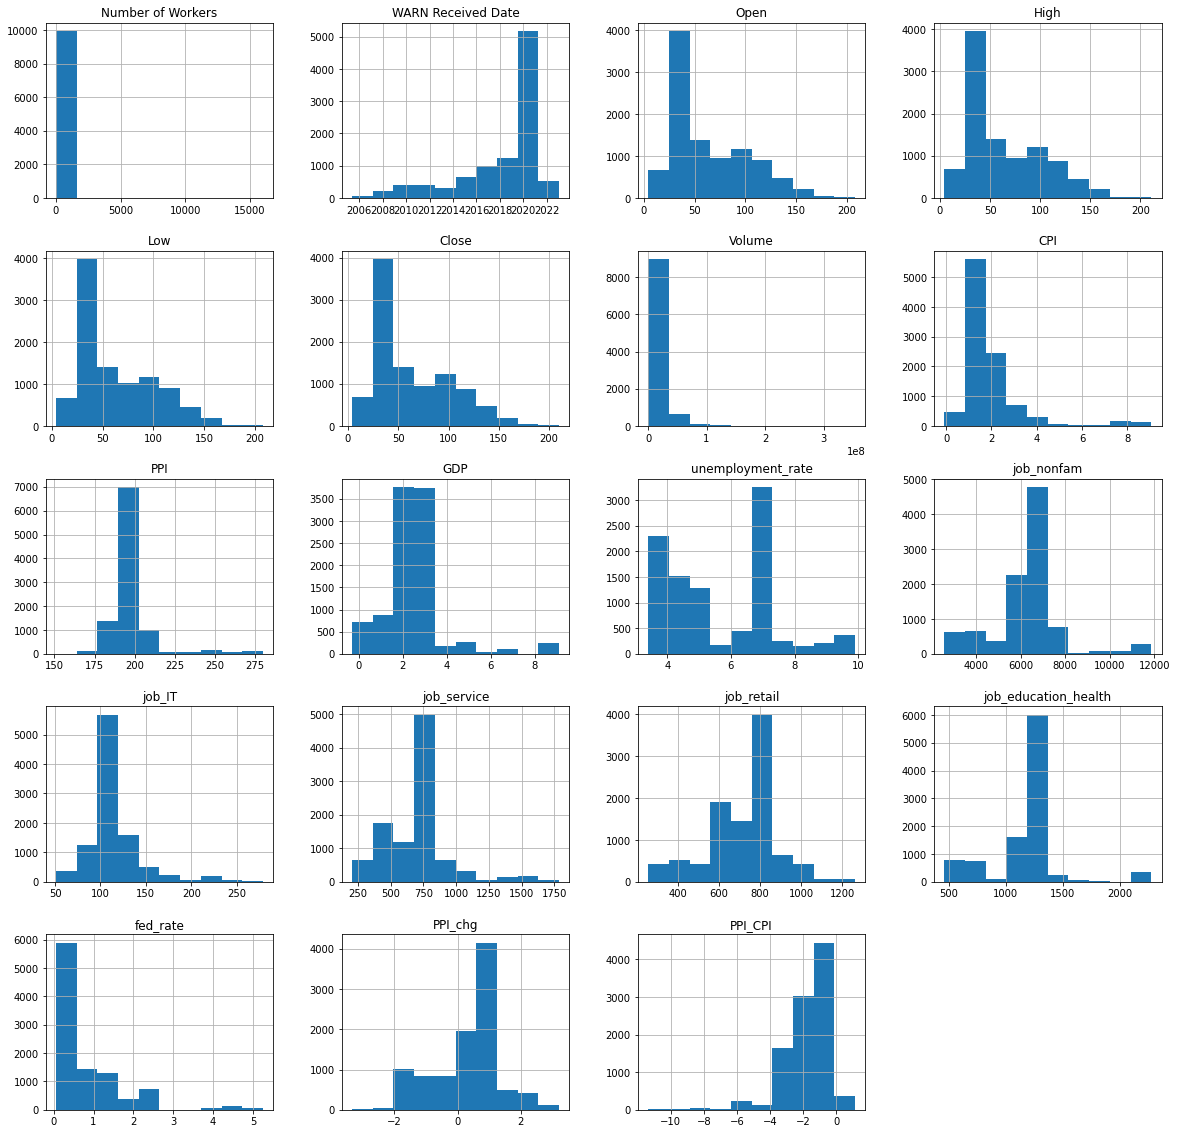

In [120]:
df.hist(figsize=(20,20))

<Axes: >

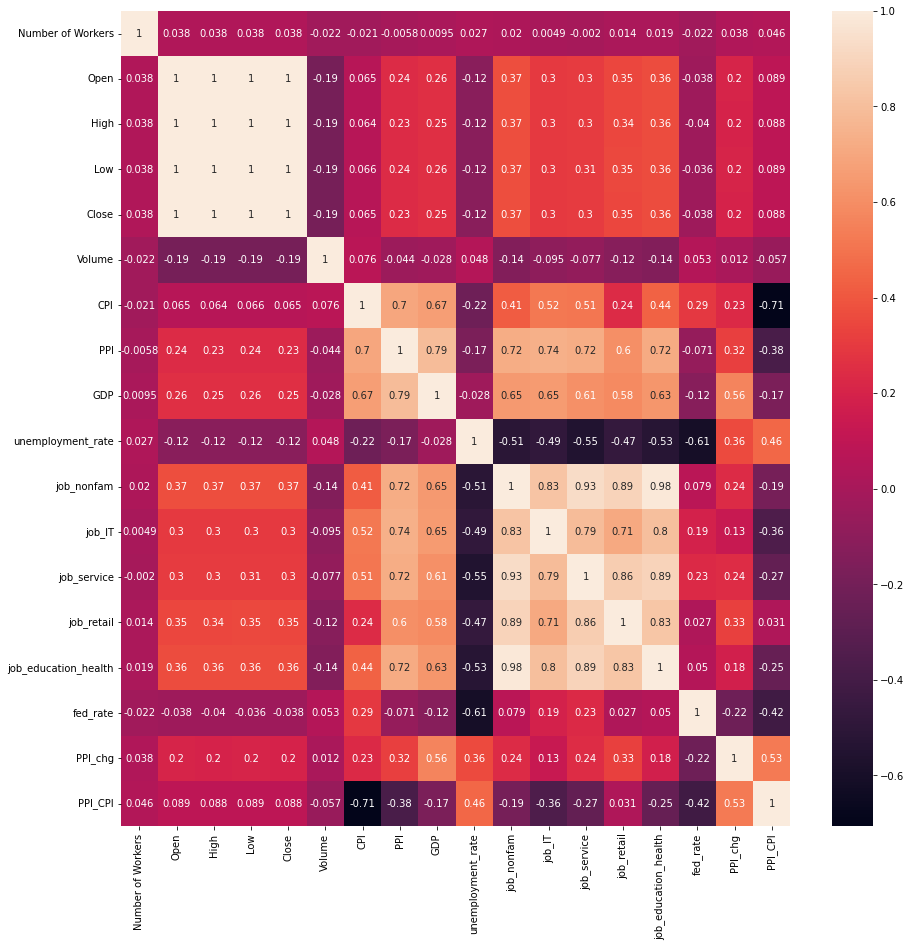

In [121]:
fig, ax = plt.subplots(figsize=(15,15))    
sns.heatmap(df.corr(), annot=True, ax=ax)

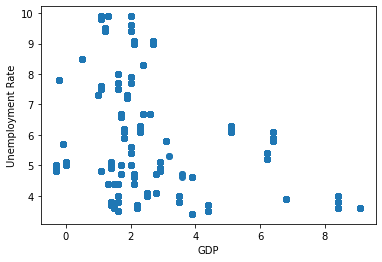

In [122]:
# Visualize the relationship between two numerical columns using a scatter plot
plt.scatter(df['GDP'], df['unemployment_rate'])
plt.xlabel('GDP')
plt.ylabel('Unemployment Rate')
plt.show()

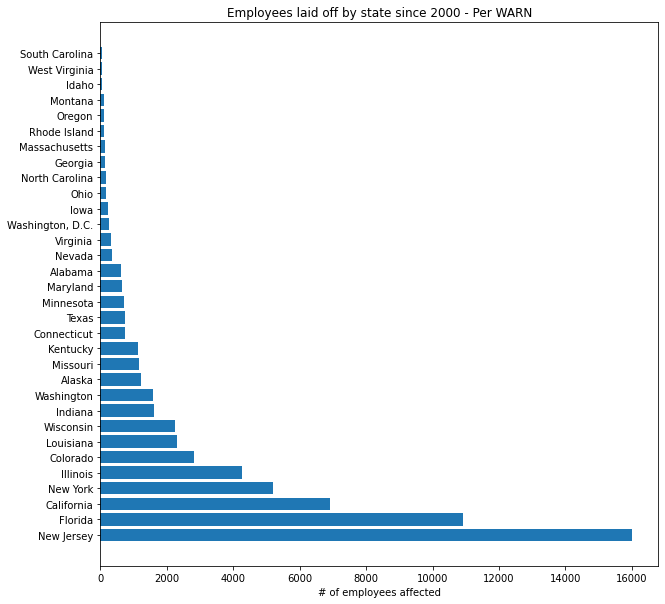

In [123]:
sortedDF = df.sort_values(by=['Number of Workers'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
 
plt.barh(y='State', width='Number of Workers', data=sortedDF)
plt.xlabel('# of employees affected')
plt.title('Employees laid off by state since 2000 - Per WARN')
plt.show()

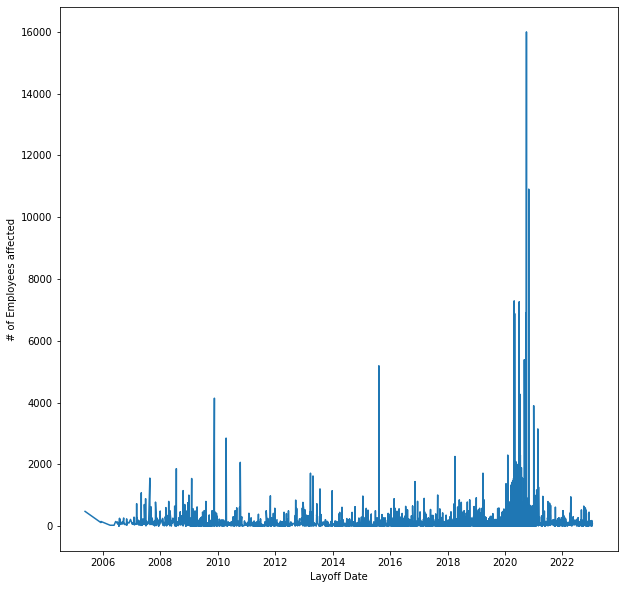

In [124]:
sortedDF = df.sort_values(by=['WARN Received Date'], ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
 
plt.plot(sortedDF['WARN Received Date'], sortedDF['Number of Workers'])
plt.xlabel('Layoff Date')
plt.ylabel('# of Employees affected')
plt.show()

# Feature Engineering


In [125]:
# Day month year of layoffs
df['Day'] = df['WARN Received Date'].dt.day
df['Month'] = df['WARN Received Date'].dt.month
df['Year'] = df['WARN Received Date'].dt.year

df['Price Volatility'] = df['High'] - df['Low']

In [127]:
# One hot encode
df = pd.get_dummies(df, columns=['Industry'])

In [128]:
df.dtypes

State                                                              object
Number of Workers                                                   int64
WARN Received Date                                         datetime64[ns]
Open                                                              float64
High                                                              float64
Low                                                               float64
Close                                                             float64
Volume                                                            float64
CPI                                                               float64
PPI                                                               float64
GDP                                                               float64
unemployment_rate                                                 float64
job_nonfam                                                        float64
job_IT                                